# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [40]:
#Name:Godwin Thomas
#Summar: Script visualizing the weather of 500+ cities across the world of varying distance from the equator.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#fereinhit query
temp_units = "imperial"

#API url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

#test = requests.get(query_url) <--determins if there is a connection to API

response = requests.get(query_url).json() #saves json file in response variable

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
#initialize lists
lats = []
lngs = []
countries = []
cloudiness = []
cityName = []
dates = []
humidity = []
max_temps = []
wind_speeds = []


# initialize counters
counter = 0
set_one = 1

#print beginning of data retrieval
print("    Beginning Data Retrieval    ")
print("--------------------------------")

#iterates through cities list and adds to end of API url
for city in cities: 
    
    try:
        response = requests.get(query_url + city.replace(" ","&")).json() #returns json file 
        cloudiness.append(response['clouds']['all']) #return value pair
        countries.append(response['sys']['country']) #return value pair for sys dictionary and adds to counties list
        dates.append(response['dt']) #adds date to dates list
        humidity.append(response['main']['humidity']) #returns value pair and adds to humidity list
        lats.append(response['coord']['lat']) #returns value pair for lat and adds to lats list
        lngs.append(response['coord']['lon']) #returns value pair for lngs and adds to lngs list
        max_temps.append(response['main']['temp_max']) 
        wind_speeds.append(response['wind']['speed'])
        
        #creates counter to display during city calls
        if counter > 48: #reset counter after reaching 49
            counter = 1
            set_one += 1 
            cityName.append(city)
        else:
            counter += 1
            cityName.append(city)
        
        #formatted string to display counters and city
        print(f"Processing Record {counter} of Set {set_one} | {city}") 
        
    except Exception: #if Exception error exists,run this print line
        print("city not found. skipping...")
        
#end of data retrieval        
print("---------------------------------")
print("    Data Retrieval Complete      ")
print("---------------------------------")

    Beginning Data Retrieval    
--------------------------------
Processing Record 1 of Set 1 | ushuaia
city not found. skipping...
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | sidhi
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | yulara
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | sangar
Processing Record 9 of Set 1 | margate
Processing Record 10 of Set 1 | moreira sales
Processing Record 11 of Set 1 | sivas
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | namibe
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | ariquemes
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | souris
Processing Record 19 of Set 1 | nouadhibou
city not found. skipping...
Processing Record 20 of Set 1 | aklavik
Processing Record 21 of Set 1 | aksu
Processing Record 22 of Set 1 | concepcion

Processing Record 39 of Set 4 | port hardy
Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | valleyview
Processing Record 43 of Set 4 | rovaniemi
Processing Record 44 of Set 4 | nikel
Processing Record 45 of Set 4 | rawson
Processing Record 46 of Set 4 | maceio
Processing Record 47 of Set 4 | sorsk
Processing Record 48 of Set 4 | piracuruca
Processing Record 49 of Set 4 | chapais
Processing Record 1 of Set 5 | saint-augustin
Processing Record 2 of Set 5 | kerman
Processing Record 3 of Set 5 | mangrol
Processing Record 4 of Set 5 | sao felix do xingu
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | maniitsoq
Processing Record 7 of Set 5 | nhulunbuy
Processing Record 8 of Set 5 | llaillay
city not found. skipping...
Processing Record 9 of Set 5 | niquelandia
Processing Record 10 of Set 5 | mount isa
Processing Record 11 of Set 5 | bredasdorp
Processing Record 12 of Set 5 | victor harbor
Processin

Processing Record 24 of Set 8 | ejido
Processing Record 25 of Set 8 | upata
Processing Record 26 of Set 8 | bosaso
Processing Record 27 of Set 8 | drayton valley
Processing Record 28 of Set 8 | inuvik
Processing Record 29 of Set 8 | glenwood springs
Processing Record 30 of Set 8 | havoysund
Processing Record 31 of Set 8 | talaya
Processing Record 32 of Set 8 | barra patuca
Processing Record 33 of Set 8 | limay
Processing Record 34 of Set 8 | san pedro buenavista
Processing Record 35 of Set 8 | sao jose da coroa grande
Processing Record 36 of Set 8 | gua
Processing Record 37 of Set 8 | ballina
city not found. skipping...
Processing Record 38 of Set 8 | bahile
Processing Record 39 of Set 8 | zakamensk
Processing Record 40 of Set 8 | avera
Processing Record 41 of Set 8 | litoral del san juan
Processing Record 42 of Set 8 | kiruna
city not found. skipping...
Processing Record 43 of Set 8 | cam pha
Processing Record 44 of Set 8 | richards bay
Processing Record 45 of Set 8 | isangel
Processi

Processing Record 11 of Set 12 | machaneng
Processing Record 12 of Set 12 | homer
Processing Record 13 of Set 12 | ondjiva
city not found. skipping...
Processing Record 14 of Set 12 | bayreuth
Processing Record 15 of Set 12 | carman
Processing Record 16 of Set 12 | tilichiki
Processing Record 17 of Set 12 | weilerswist
Processing Record 18 of Set 12 | seymchan
Processing Record 19 of Set 12 | youkounkoun
city not found. skipping...
Processing Record 20 of Set 12 | muroto
Processing Record 21 of Set 12 | namatanai
Processing Record 22 of Set 12 | zambezi
Processing Record 23 of Set 12 | artyom
Processing Record 24 of Set 12 | mawlaik
Processing Record 25 of Set 12 | lander
Processing Record 26 of Set 12 | christchurch
city not found. skipping...
Processing Record 27 of Set 12 | erzin
city not found. skipping...
Processing Record 28 of Set 12 | provideniya
Processing Record 29 of Set 12 | madhipura
Processing Record 30 of Set 12 | fort nelson
Processing Record 31 of Set 12 | halifax
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
#create dictionary with weather data
weatherData = {
    "City":cityName,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidity,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

df = pd.DataFrame(weatherData) #create dataframe

# output data to csv
df.to_csv("WeatherData.csv")

df.head() #show first 5 rows

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,0,AR,1570081500,65,-54.81,-68.31,41.00,29.97
1,bathsheba,20,BB,1570081779,74,13.22,-59.52,82.40,18.34
2,sidhi,74,IN,1570081779,73,24.41,81.88,80.64,6.53
3,mataura,45,NZ,1570081484,89,-46.19,168.86,48.99,8.01
4,airai,0,TL,1570081779,29,-8.93,125.41,94.36,2.77


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

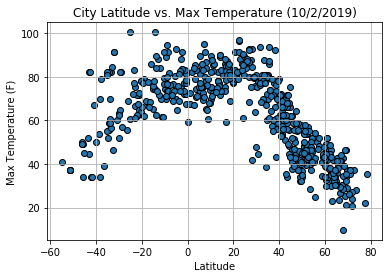

<Figure size 432x288 with 0 Axes>

In [44]:
plt.scatter(df["Lat"],df["Max Temp"],edgecolors="black") #create scatterplot for max temp
plt.xlabel("Latitude") #x-axis label
plt.ylabel("Max Temperature (F)") #y-axis label
plt.title("City Latitude vs. Max Temperature (10/2/2019)") #scatterplot title
plt.grid (b=True,axis="both",linestyle="-") #enable grid
plt.show() 

#save as .png
plt.savefig("Lat_vs_Temp.png") #lat vs temp

#### Latitude vs. Humidity Plot

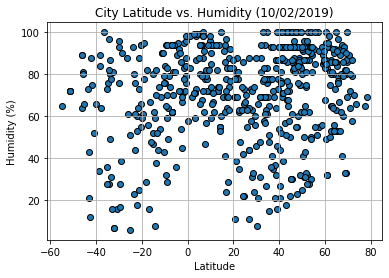

In [45]:
plt.scatter(df["Lat"],df["Humidity"],edgecolors="black") #create scatterplot for humidity
plt.xlabel("Latitude") #x-axis label
plt.ylabel("Humidity (%)") #y-axis label
plt.title("City Latitude vs. Humidity (10/02/2019)") #create title
plt.grid (b=True,axis="both",linestyle="-") #enable grid
plt.savefig("Lat_Vs_Humid.png") #save as png

plt.show() 

#### Latitude vs. Cloudiness Plot

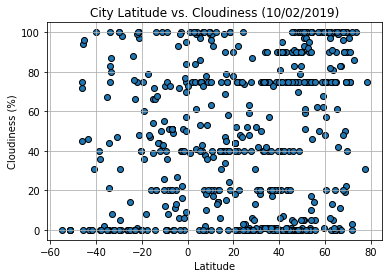

In [46]:
plt.scatter(df["Lat"],df["Cloudiness"],edgecolors="black") #create scatterplot for cloudiness
plt.title("City Latitude vs. Cloudiness (10/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,axis="both",linestyle="-")
plt.savefig("Lat_Vs_Cloud.png")

plt.show() 

#### Latitude vs. Wind Speed Plot

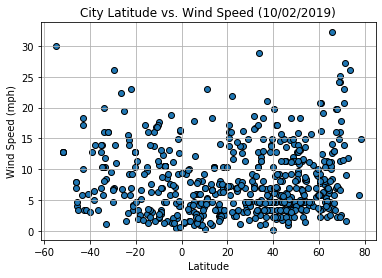

In [47]:
plt.scatter(df["Lat"],df["Wind Speed"],edgecolors="black") #create scatterplot for wind speed
plt.xlabel("Latitude") #x-axis label
plt.ylabel("Wind Speed (mph)") #y-axis label
plt.title("City Latitude vs. Wind Speed (10/02/2019)") #scatterplot title
plt.grid (b=True,axis="both",linestyle="-") #enablegrid
plt.savefig("Lat_vs_Windspeed.png") #savepng 

plt.show()

In [ ]:
#Summary
#Based on the data, as you get closer to the equater(0degrees latitude), the temperature seems to get higher
#Based on the data, there is no corrilation between latitude and humidity
#based on the data, wind speed is mostly between 0 and 10mph
